In [1]:
import numpy as np
import torch
from data_gen import *
from BP import *
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

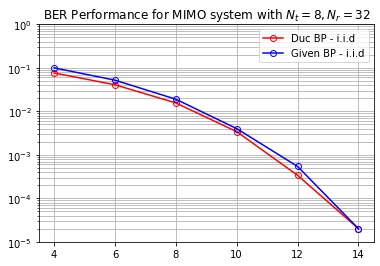

In [2]:
# Plain BP in 8 x 32 Configuration 

Nt, Nr, L = 8, 32, 5
batch = 500
Es = 10
Rx, Tx = 0.0, 0.0
SNR = np.arange(4,15,2)
noise_var = noise_variance(SNR, Es, Nt)
device = torch.device('cuda:0')
delta = 0.20

num = 0
flag = 0
BER = np.zeros((6))
ER  = np.zeros((6))

given_BER = np.array([1e-1, 5.2e-2, 1.9e-2, 4e-3, 5.4e-4, 2e-5])

while (num < 100):
    num += 1
    for noise in noise_var:
        y, x, H = data_gen_16QAM(batch, Nt, Nr, noise, Rx, Tx, device)
        P = torch.ones(size=(batch, 2*Nr, 2*Nt, 4), device=device)*0.25
     
        for l in range(L):
            x_p, P = BP_16QAM_layer( y, H, noise, P, delta, device)
        
        ER[flag%6] += torch.sum(torch.squeeze(x_p) != torch.squeeze(x.cuda()))
        BER[flag%6] = ER[flag%6]/(batch*4*Nt*(num))
        
        flag += 1        
    
    line1 = plt.plot(SNR, BER,c='red', ls='-', marker='o', mfc='none')
    line2 = plt.plot(SNR, given_BER,c='blue', ls='-', marker='o', mfc='none')
    plt.yscale('log')
    plt.title('BER Performance for MIMO system with $N_{t} = 8, N_{r} = 32$')
    plt.grid(True, which = 'both')
    plt.ylim(1e-5, 1e0)
    plt.legend(('Duc BP - i.i.d','Given BP - i.i.d'))
    
    clear_output(wait = True)
    plt.pause(0.01)

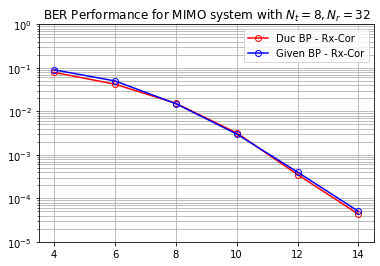

In [4]:
# Plain BP in 8 x 32 Configuration with Rx = 0.3, Tx = 0.0

Nt, Nr, L = 8, 32, 10
batch = 500
Es = 10
Rx, Tx = 0.3, 0.0
SNR = np.arange(4,15,2)
noise_var = noise_variance(SNR, Es, Nt)
device = torch.device('cuda:0')
delta = 0.02

num = 0
flag = 0
BER = np.zeros((6))
ER  = np.zeros((6))

given_BER = np.array([9e-2, 5e-2, 1.5e-2, 3e-3, 4e-4, 5e-5])

while (num<100):
    num += 1
    for noise in noise_var:
        y, x, H = data_gen_16QAM(batch, Nt, Nr, noise, Rx, Tx, device)
        P = torch.ones(size=(batch, 2*Nr, 2*Nt, 4), device=device)*0.25
     
        for l in range(L):
            x_p, P = BP_16QAM_layer( y, H, noise, P, delta, device)
        
        ER[flag%6] += torch.sum(torch.squeeze(x_p) != torch.squeeze(x.cuda()))
        BER[flag%6] = ER[flag%6]/(batch*4*Nt*(num))
        
        flag += 1        
    
    line1 = plt.plot(SNR, BER,c='red', ls='-', marker='o', mfc='none')
    line2 = plt.plot(SNR, given_BER,c='blue', ls='-', marker='o', mfc='none')
    plt.yscale('log')
    plt.title('BER Performance for MIMO system with $N_{t} = 8, N_{r} = 32$')
    plt.grid(True, which = 'both')
    plt.ylim(1e-5, 1e0)
    plt.legend(('Duc BP - Rx-Cor','Given BP - Rx-Cor'))
    
    clear_output(wait = True)
    plt.pause(0.01)

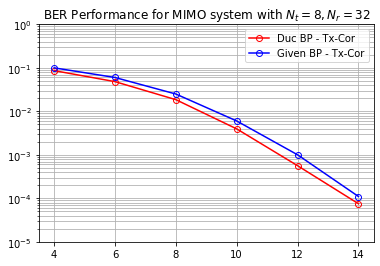

In [5]:
# Plain BP in 8 x 32 Configuration with Rx = 0.0, Tx = 0.3

Nt, Nr, L = 8, 32, 10
batch = 500
Es = 10
Rx, Tx = 0.0, 0.3
SNR = np.arange(4,15,2)
noise_var = noise_variance(SNR, Es, Nt)
device = torch.device('cuda:0')
delta = 0.3

num = 0
flag = 0
BER = np.zeros((6))
ER  = np.zeros((6))

given_BER = np.array([1e-1, 6e-2, 2.5e-2, 6e-3, 1e-3, 1.1e-4])

while (num<100):
    num += 1
    for noise in noise_var:
        y, x, H = data_gen_16QAM(batch, Nt, Nr, noise, Rx, Tx, device)
        P = torch.ones(size=(batch, 2*Nr, 2*Nt, 4), device=device)*0.25
     
        for l in range(L):
            x_p, P = BP_16QAM_layer( y, H, noise, P, delta, device)
        
        ER[flag%6] += torch.sum(torch.squeeze(x_p) != torch.squeeze(x.cuda()))
        BER[flag%6] = ER[flag%6]/(batch*4*Nt*(num))
        
        flag += 1        
    
    line1 = plt.plot(SNR, BER,c='red', ls='-', marker='o', mfc='none')
    line2 = plt.plot(SNR, given_BER,c='blue', ls='-', marker='o', mfc='none')
    plt.yscale('log')
    plt.title('BER Performance for MIMO system with $N_{t} = 8, N_{r} = 32$')
    plt.grid(True, which = 'both')
    plt.ylim(1e-5, 1e0)
    plt.legend(('Duc BP - Tx-Cor','Given BP - Tx-Cor'))
    
    clear_output(wait = True)
    plt.pause(0.01)

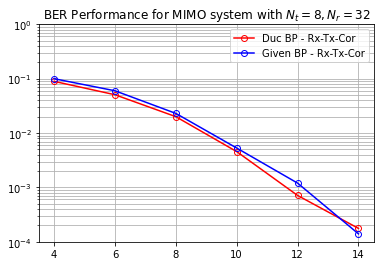

In [7]:
# Plain BP in 8 x 32 Configuration with Rx = 0.3, Tx = 0.3

Nt, Nr, L = 8, 32, 10
batch = 500
Es = 10
Rx, Tx = 0.3, 0.3          
SNR = np.arange(4,15,2)
noise_var = noise_variance(SNR, Es, Nt)
device = torch.device('cuda:0')
delta = 0.26   

num = 0
flag = 0
BER = np.zeros((6))
ER  = np.zeros((6))

given_BER = np.array([1e-1, 6e-2, 2.3e-2, 5.3e-3, 1.2e-3, 1.4e-4])

while (num<100):
    num += 1
    for noise in noise_var:
        y, x, H = data_gen_16QAM(batch, Nt, Nr, noise, Rx, Tx, device)
        P = torch.ones(size=(batch, 2*Nr, 2*Nt, 4), device=device)*0.25
     
        for l in range(L):
            x_p, P = BP_16QAM_layer( y, H, noise, P, delta, device)
        
        ER[flag%6] += torch.sum(torch.squeeze(x_p) != torch.squeeze(x.cuda()))
        BER[flag%6] = ER[flag%6]/(batch*4*Nt*(num))
        
        flag += 1        
    
    line1 = plt.plot(SNR, BER,c='red', ls='-', marker='o', mfc='none')
    line2 = plt.plot(SNR, given_BER,c='blue', ls='-', marker='o', mfc='none')
    plt.yscale('log')
    plt.title('BER Performance for MIMO system with $N_{t} = 8, N_{r} = 32$')
    plt.grid(True, which = 'both')
    plt.ylim(1e-4, 1e0)
    plt.legend(('Duc BP - Rx-Tx-Cor','Given BP - Rx-Tx-Cor'))
    
    clear_output(wait = True)
    plt.pause(0.01)